<a href="https://colab.research.google.com/github/amorenooya/MIAR/blob/main/Proyecto_pra%CC%81ctico_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Ane Moreno Oya
*   Alumno 2: Isabel María Suárez Sánchez
*   Alumno 3: Naroa Alonso Fernández
*   Alumno 4: Antonio Manuel Míguez Vega






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/drive'
drive_root = mount + "My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Colab: making sure  /content/driveMy Drive/VIU/Aprendizaje por refuerzo  exists.

Colab: Changing directory to  /content/driveMy Drive/VIU/Aprendizaje por refuerzo
/content/driveMy Drive/VIU/Aprendizaje por refuerzo
Archivos en el directorio: 
[]


---
### 1.4. Instalar librerías necesarias

In [3]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12.0
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=ec515a5b82799e3c47755bceab56dd122564d40d6a46fe288f8abbecae54e1ac
  Stored in directory: /root/.cache/pip/wheels/07/8b/b7/570cb90b10f17e85ccb291ba1f04af41ec697745104a2263eb
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2024.12.1 requires cloudpickle>

In [ ]:
!pip install pyvirtualdisplay

^C


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [3]:
from __future__ import division

from PIL import Image
import numpy as np
import gym
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

import re

#### Configuración base

In [4]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [5]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

1. Implementación de la red neuronal

In [7]:
# Usamos la arquitectura canónica de DeepMind para los juegos de Atari descrita en Mnih et al. (2015).
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()
print(K.image_data_format())
if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

# Primera capa convolucional
model.add(Convolution2D(32, (8, 8), strides=(4, 4), activation='relu'))

# Segunda capa convolucional
model.add(Convolution2D(64, (4, 4), strides=(2, 2), activation='relu'))

# Tercera capa convolucional
model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))

# Aplanamos la salida para la capa densa
model.add(Flatten())

# Capa densa (fully connected)
model.add(Dense(512, activation='relu'))

# Capa de salida: una neurona por cada acción posible
model.add(Dense(nb_actions, activation='linear'))

print(model.summary())

channels_last
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)    

2. Implementación de la solución DQN

In [6]:
# Hiperparametros a ajustar
MEMORY_SIZE = 1000000           # Tamaño de la Replay Memory

EPSILON_MAX = 1.0               # ε inicial
EPSILON_MIN = 0.1               # ε final
EPSILON_TEST = 0.05             # ε en modo test

ANNEALING_STEPS = 1000000       # Steps para decaer de max a min
ANNEALING_STEPS_WARMUP = 50000  # Steps de acciones aleatorias antes de empezar a entrenar
TOTAL_TRAINING_STEPS = 1750000  # Steps totales de entrenamiento

GAMMA = 0.99                    # Factor de descuento
TARGET_MODEL_UPDATE = 10000     # Frecuencia de actualización de la target network
TRAIN_INTERVAL = 4              # Entrenar cada 4 pasos
DELTA_CLIP=1.                   # Huber loss para estabilizar el entrenamiento

LEARNING_RATE = 0.0001          # Tasa de aprendizaje

In [ ]:
# 1. Replay memory: Almacena las tuplas SARS' (state, action, reward, new_state)
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)

# 2. Policy: ε-Greedy con lineal annealing. Al principio explora mucho (ε=1.0) y gradualmente explota más (ε=0.1)
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=EPSILON_MAX,
                              value_min=EPSILON_MIN,
                              value_test=EPSILON_TEST,
                              nb_steps=ANNEALING_STEPS)

# 3. Agente DQN
processor = AtariProcessor()
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=ANNEALING_STEPS_WARMUP,
               gamma=GAMMA,
               target_model_update=TARGET_MODEL_UPDATE,
               train_interval=TRAIN_INTERVAL,
               delta_clip=DELTA_CLIP)

# 4. Compilación
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

# 5. Entrenamiento
weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
checkpoint_weights_filename = 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = 'dqn_{}_log.json'.format(env_name)

In [8]:
# Dado que el ModelIntervalCheckpoint de Keras-rl no tiene memoria de entrenamientos anteriores, vamos a crear uno custom que sea stateful y reciba los initial_steps
class StatefulModelIntervalCheckpoint(Callback):
    def __init__(self, filepath, interval, initial_steps=0, verbose=1):
        super(StatefulModelIntervalCheckpoint, self).__init__()
        self.filepath = filepath
        self.interval = interval
        self.verbose = verbose
        self.initial_steps = initial_steps
        self.last_saved_at_step = initial_steps
        self.current_fit_steps = 0

    def on_step_end(self, step, logs={}):
        self.current_fit_steps += 1

        absolute_step = self.initial_steps + self.current_fit_steps

        intervals_now = absolute_step // self.interval
        intervals_before = self.last_saved_at_step // self.interval

        if intervals_now > intervals_before:
            save_step = intervals_now * self.interval
            filepath = self.filepath.format(step=save_step)

            if self.verbose > 0:
                print(f'\n[Callback] Guardando pesos para el paso {save_step}.')

            self.model.save_weights(filepath, overwrite=True)
            self.last_saved_at_step = absolute_step

In [ ]:
# Dado que usamos checkpoints, buscamos los ficheros, si los hubiera, para reanudar. Tendremos que recalcular el ε y los steps restantes.
WEIGHTS_PREFIX = f'dqn_{env_name}_weights'
checkpoint_pattern = re.compile(f"^{WEIGHTS_PREFIX}_(\\d+)\\.h5f\\.index$")
latest_step = -1
latest_weights_file = None

print(f"Buscando checkpoints en Google Drive")
for filename in os.listdir():
    match = checkpoint_pattern.match(filename)
    if match:
        step = int(match.group(1))
        if step > latest_step:
            latest_step = step
            # Guardamos el nombre base del fichero, sin la extensión .index
            latest_weights_file = filename.replace('.index', '')

completed_steps = 0

# Si encontramos ficheros de checkpoint...
if latest_weights_file:
    completed_steps = latest_step
    print(f"Checkpoint encontrado: {latest_weights_file} (paso {completed_steps})")

    # Cargamos checkpoint
    dqn.load_weights(latest_weights_file)

    # Calcula el ε de reanudación
    fraction_completed = min(1.0, float(completed_steps) / float(ANNEALING_STEPS))
    current_epsilon = EPSILON_MAX - fraction_completed * (EPSILON_MAX - EPSILON_MIN)
    remaining_annealing_steps = ANNEALING_STEPS - completed_steps

    print(f"Configurando política para reanudar: Epsilon inicial = {current_epsilon:.4f}, Pasos de decaimiento restantes = {remaining_annealing_steps}")

    # Crea la política final con los parámetros determinados automáticamente
    final_policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                                      attr='eps',
                                      value_max=current_epsilon,
                                      value_min=EPSILON_MIN,
                                      value_test=EPSILON_TEST,
                                      nb_steps=remaining_annealing_steps)

    # Asigna la política correcta al agente
    dqn.policy = final_policy

    # Además, no necesitamos hacer de nuevo todo el warmup ya que la red está en mitad del aprendizaje y meter experiencias aleatorias en este punto no va a ayudar
    # Usaremos el batch size por defecto en DQN = 32
    dqn.nb_steps_warmup = 32

# Steps restantes
remaining_steps = TOTAL_TRAINING_STEPS - completed_steps

# Callbacks referenciando nuestro custom ModelIntervalCheckpoint
callbacks = [StatefulModelIntervalCheckpoint(checkpoint_weights_filename, interval=25000, initial_steps=completed_steps, verbose=1)]
callbacks += [FileLogger(log_filename, interval=100)]

if remaining_steps > 0:
    # Entrenamos
    dqn.fit(env, callbacks=callbacks, nb_steps=remaining_steps, log_interval=10000)

    # Guardamos pesos
    dqn.save_weights(weights_filename, overwrite=True)
else:
    print("\nEl entrenamiento ya se había completado. No hay más pasos que entrenar.")

In [ ]:
from pyvirtualdisplay import Display
from IPython.display import HTML
from gym import wrappers
import io
import base64
import glob

# Guardar los videos de las partidas
env = wrappers.Monitor(env, "./Videos", force=True)

# Crear una pantalla virtual para renderizar el entorno en Colab
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
def show_video():
    mp4list = glob.glob('./Videos/*.mp4')
    if len(mp4list) == 0:
        print("No hay video.")
        return
    video_path = mp4list[0]  # Tomar el primer video
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data=f'''
        <video width="480" height="auto" controls>
            <source src="data:video/mp4;base64,{encoded.decode('ascii')}" type="video/mp4" />
        </video>''')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
test=dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 33.000, steps: 1666
Episode 2: reward: 14.000, steps: 526
Episode 3: reward: 20.000, steps: 1029
Episode 4: reward: 27.000, steps: 1398
Episode 5: reward: 25.000, steps: 1057
Episode 6: reward: 29.000, steps: 1351
Episode 7: reward: 12.000, steps: 548
Episode 8: reward: 13.000, steps: 553
Episode 9: reward: 19.000, steps: 1002
Episode 10: reward: 16.000, steps: 637


In [ ]:
rewards = test.history['episode_reward']
print('Rango de recompensas: ', int(np.min(rewards)), "-", int(np.max(rewards)))
print("Recompensa media: ", np.mean(rewards))
print("Desviación estándar de la recompensa: ", np.std(rewards))

Rango de recompensas:  12 - 33
Recompensa media:  20.8
Desviación estándar de la recompensa:  6.954135460285484


In [ ]:
show_video()

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_experiments(experiments, fields_to_plot):
    # Asignar un color distinto para cada experimento
    colors = plt.cm.tab10(np.linspace(0, 1, len(experiments)))

    # Cargar datos de cada archivo JSON en un diccionario
    data = {}
    for name, path in experiments.items():
        with open(path, 'r') as f:
            data[name] = json.load(f)

    # Convertir cada conjunto de datos en un DataFrame de pandas
    dfs = {name: pd.DataFrame(exp_data) for name, exp_data in data.items()}

    # Definir la cantidad de campos a graficar
    n_fields = len(fields_to_plot)

    # Configurar la figura y subplots según el número de campos
    if n_fields == 6:
        fig, axs = plt.subplots(3, 2, figsize=(15, 20))
        axs = axs.flatten()  # Facilitar la indexación lineal
    elif n_fields == 3:
        fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    elif n_fields == 1:
        fig, axs = plt.subplots(1, 1, figsize=(15, 5))
        axs = np.array([axs])  # Convertir a array para iterar igual que en otros casos
    else:
        # Caso general: organizar subplots en filas y columnas automáticas
        n_cols = min(n_fields, 3)
        n_rows = int(np.ceil(n_fields / n_cols))
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 2.5 * n_rows))
        axs = axs.flatten()

    # Ajustar espacio entre subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    # Ajustes de estilo
    xlabel_fontsize = 15
    ylabel_fontsize = 15
    title_fontsize = 15.5
    tick_fontsize = 14

    # Ajustar espacio entre subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    # Graficar cada campo
    for i, field in enumerate(fields_to_plot):
        ax = axs[i]
        for (name, df), color in zip(dfs.items(), colors):
            if field in df.columns:
                ax.plot(df[field], label=name, color=color)
        ax.set_xlabel("Timestep", fontweight='bold', fontsize=xlabel_fontsize)
        ax.set_ylabel(field, fontweight='bold', fontsize=ylabel_fontsize)
        ax.set_title(field, fontweight='bold', fontsize=title_fontsize)
        ax.tick_params(axis='both', labelsize=tick_fontsize)
        ax.legend()
        ax.grid(True)

    # Si hay subplots vacíos, ocultarlos
    for j in range(n_fields, len(axs)):
        fig.delaxes(axs[j])

    # Ajustar layout para evitar solapamientos
    plt.tight_layout()
    plt.show()

In [ ]:
experiments = {
    "EXP 2": "dqn_SpaceInvaders-v0_log.json"
}

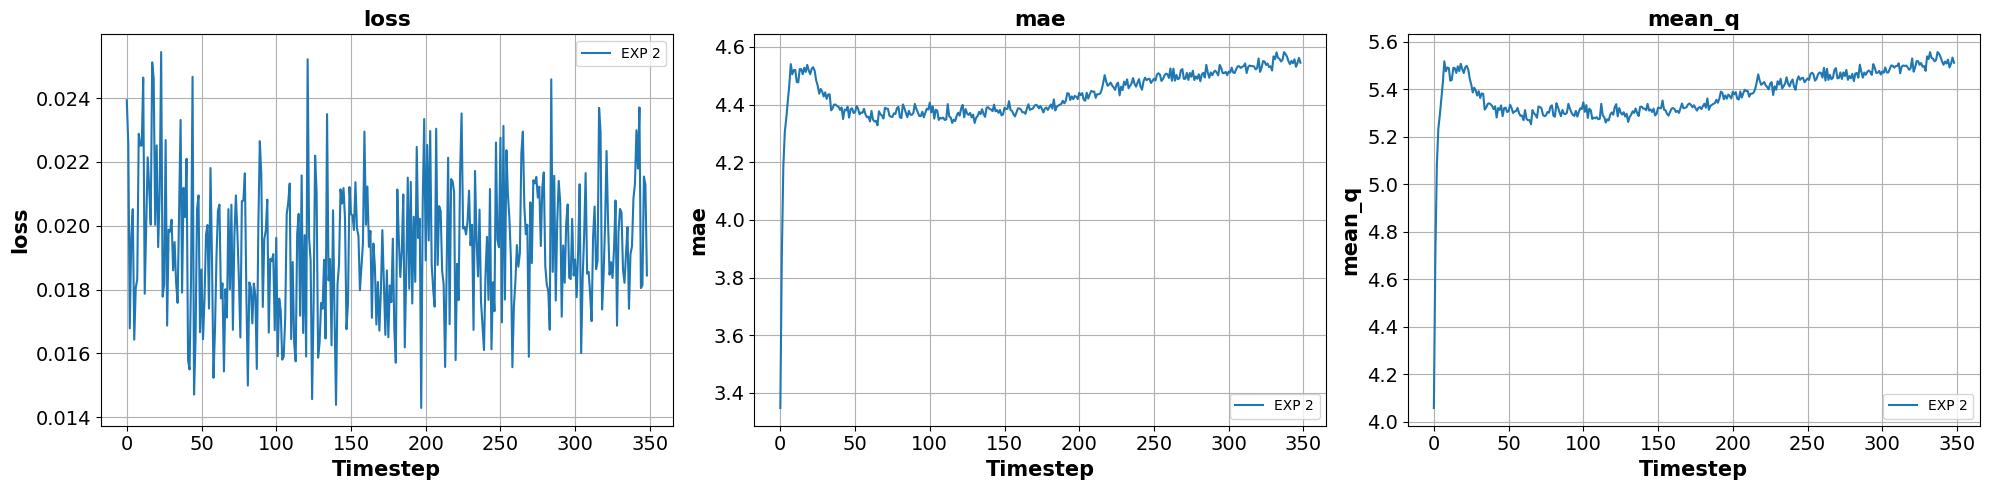

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
plot_experiments(experiments, fields_to_plot)

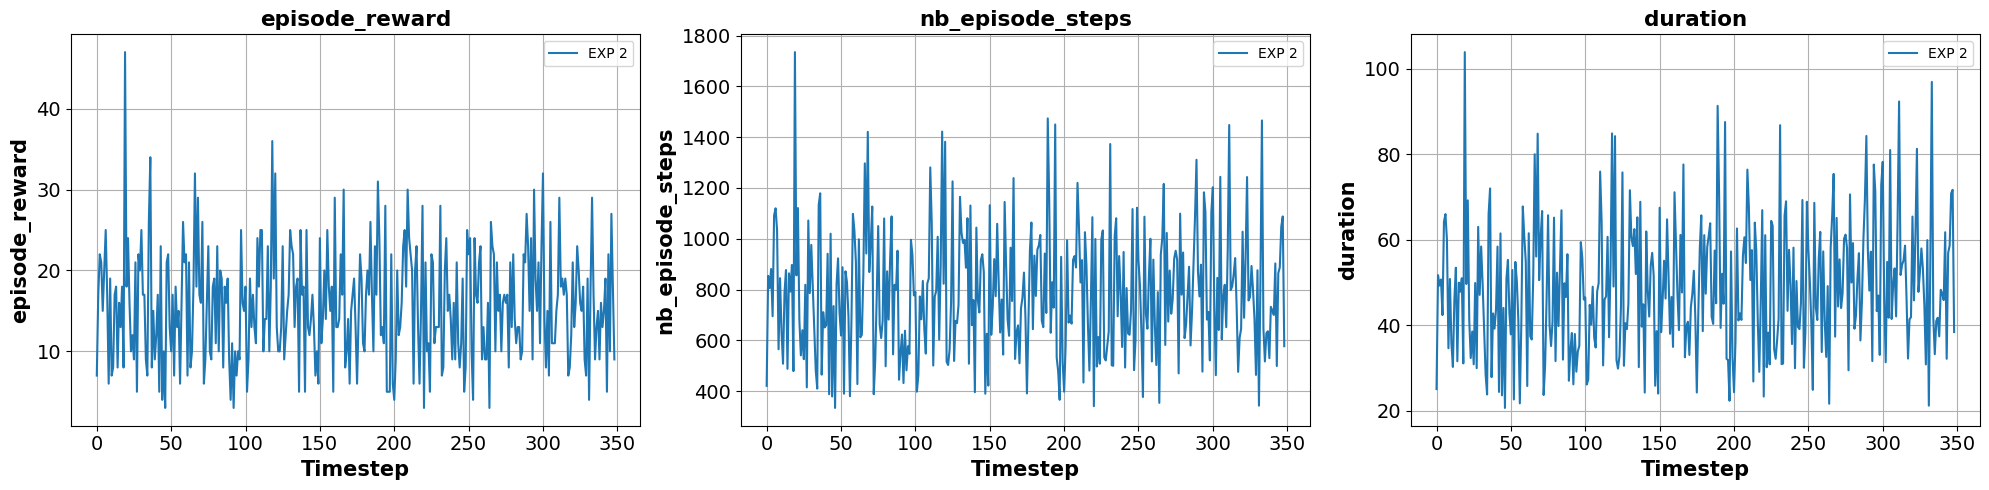

In [ ]:
fields_to_plot = ["episode_reward", "nb_episode_steps", "duration"]
plot_experiments(experiments, fields_to_plot)

---

**TODO: Esto es solo un "brain dump" para empezar el trabajo y poder colaborar. Habría que redactar en condiciones.**

Inicialmente hemos seleccionado la arquitectura de red neuronal canónica de DeepMind para los juegos de Atari descrita en Mnih et al. (2015).

Dado que el juego es Spade Invaders, el cual es relativamente simple, podríamos simplificar la red y quedarnos con dos capas convolucionales para que el tiempo de entrenamiento baje y aún así podría ser suficiente para alcanzar los 20 puntos de recompensa (aunque su techo de rendimiento sería más bajo, obviamente). Decidimos de momento continuar con esta arquitectura típica.

Con respecto a los hiperparámetros elegidos de DQN, empezamos con los mostrados en en Mnih et al. (2015):

*   Memoria (limit): La memoria del paper almacenaba el último millón de frames. Quizás se pueda reducir para solo almacenar los últimos 100k o 200k, ya que un millón puede ser overkill.
*   Política de Exploración (ε y nb_steps): El ε va de 1.0 a 0.1 en 1 millón de pasos. De nuevo, quizás se pueda reducir de nuevo de pasos que el agente pasará explorando a 100k o 200k. Existe el riesgo de que el algoritmo se quede atascado en óptimos locales, no llegando a la solución óptima, así que habría que probar.
*   Agente DQN (nb_steps_warmup y target_model_update): Empezamos con 50k pasos aleatorios en memoria antes de empezar a entrenar y actualizamos la target network cada 10k pasos. Se podría probar con menos pasos aleatorios para empezar, aunque eso puede incrementar el sesgo del algoritmo al empezar con una experiencia muy corta, y actualizar la target network más frecuentemente, aunque eso podría ocasionar inestabilidad en el aprendizaje.
*   Compilación (learning_rate): Este parámetro habrá que ajustarlo en base a como se va actualizando el valor de recompensa durante el entrenamiento. El valor de 0.00025 es estándar y suele funcionar bien pero si vemos que la recompensa no sube o sube muy lentamente podríamos subirlo a 0.0005. Al contrario, si la recompensa oscila mucho, bajarlo a 0.0001 puede ser una opción.

<br>

**Experimento 1: Red canónica y Algoritmo DQN siguiendo valores del paper**

Tras un primer entrenamiento, notamos que el aprendizaje está siendo inestable y la recompensa está estancada, oscilando entre 9 y 11, sin mostrar una progresión positiva. Sin embargo, a pesar de ese estancamiento, observamos que los valores de mean_q crecen, lo cual parece indicar una sobreestimación del valor Q. Dado que el MAE también está creciendo progresivamente con cada episodio, parece ser que la red se está volviendo demasiado optimista sobre las recompensas que puede obtener mientras que la realidad no lo refleja.

En base a esto, decidimos parar el entrenamiento tras el primer checkpoint de 250k steps.

Parece obvio que el aprendizaje no está siendo efectivo con lo que probaremos a bajar la tasa de aprendizaje, de 0.00025 a 0.0001.

* Nota: Existe un parámetro en la creación del DQNAgent **enable_double_dqn** que activa la **Doble DQN**. Tras leer algunos artículos como este: https://medium.com/@alfred.weirich/experiments-with-reinforcement-learning-cff75b7d783c parece claro que la doble DQN es ampliamente aceptada como una mejora sobre la DQN estandar para mitigar la sobreestimación del valor Q. La idea es simple: se usa la red principal para seleccionar la mejor acción futura, pero se usa la target network para evaluar el valor de esa acción. Esto rompe el ciclo de retroalimentación que causa la sobreestimación. Aún así, la mantendremos deshabilitada por el momento para mejorar las recompensas modificando hiperparámetros / características de la red, continuando con el enfoque iterativo.

<br>

*Traza del primer entrenamiento:*


Training for 1750000 steps ...
Interval 1 (0 steps performed)
   26/10000 [..............................] - ETA: 40s - reward: 0.0000e+00

10000/10000 [==============================] - 47s 5ms/step - reward: 0.0133
15 episodes - episode_reward: 8.533 [5.000, 13.000] - ale.lives: 2.129

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 45s 4ms/step - reward: 0.0111
17 episodes - episode_reward: 6.824 [3.000, 16.000] - ale.lives: 2.161

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 45s 5ms/step - reward: 0.0121
15 episodes - episode_reward: 7.600 [3.000, 14.000] - ale.lives: 2.073

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 46s 5ms/step - reward: 0.0157
16 episodes - episode_reward: 10.125 [4.000, 23.000] - ale.lives: 2.054

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 45s 5ms/step - reward: 0.0140
14 episodes - episode_reward: 9.786 [5.000, 17.000] - ale.lives: 2.173

Interval 6 (50000 steps performed)
10000/10000 [==============================] - 458s 46ms/step - reward: 0.0138
14 episodes - episode_reward: 9.857 [5.000, 21.000] - loss: 0.006 - mae: 0.028 - mean_q: 0.038 - mean_eps: 0.951 - ale.lives: 1.995

Interval 7 (60000 steps performed)
10000/10000 [==============================] - 457s 46ms/step - reward: 0.0149
14 episodes - episode_reward: 10.643 [5.000, 25.000] - loss: 0.007 - mae: 0.051 - mean_q: 0.065 - mean_eps: 0.942 - ale.lives: 2.061

Interval 8 (70000 steps performed)
10000/10000 [==============================] - 462s 46ms/step - reward: 0.0143
17 episodes - episode_reward: 8.353 [4.000, 19.000] - loss: 0.006 - mae: 0.070 - mean_q: 0.088 - mean_eps: 0.933 - ale.lives: 2.056

...

Interval 18 (170000 steps performed)
10000/10000 [==============================] - 490s 49ms/step - reward: 0.0133
15 episodes - episode_reward: 9.267 [3.000, 22.000] - loss: 0.007 - mae: 0.278 - mean_q: 0.346 - mean_eps: 0.843 - ale.lives: 1.940

Interval 19 (180000 steps performed)
10000/10000 [==============================] - 499s 50ms/step - reward: 0.0132
15 episodes - episode_reward: 8.933 [3.000, 15.000] - loss: 0.007 - mae: 0.300 - mean_q: 0.372 - mean_eps: 0.834 - ale.lives: 2.158

Interval 20 (190000 steps performed)
10000/10000 [==============================] - 506s 51ms/step - reward: 0.0145
15 episodes - episode_reward: 9.067 [3.000, 22.000] - loss: 0.007 - mae: 0.327 - mean_q: 0.407 - mean_eps: 0.825 - ale.lives: 2.167

Interval 21 (200000 steps performed)
10000/10000 [==============================] - 515s 52ms/step - reward: 0.0144
14 episodes - episode_reward: 10.357 [4.000, 21.000] - loss: 0.007 - mae: 0.342 - mean_q: 0.426 - mean_eps: 0.816 - ale.lives: 2.032

Interval 22 (210000 steps performed)
10000/10000 [==============================] - 515s 51ms/step - reward: 0.0145
15 episodes - episode_reward: 10.600 [6.000, 19.000] - loss: 0.009 - mae: 0.377 - mean_q: 0.469 - mean_eps: 0.807 - ale.lives: 2.119

Interval 23 (220000 steps performed)
10000/10000 [==============================] - 495s 49ms/step - reward: 0.0156
14 episodes - episode_reward: 11.000 [3.000, 27.000] - loss: 0.009 - mae: 0.419 - mean_q: 0.520 - mean_eps: 0.798 - ale.lives: 2.182

Interval 24 (230000 steps performed)
10000/10000 [==============================] - 500s 50ms/step - reward: 0.0134
15 episodes - episode_reward: 9.067 [4.000, 18.000] - loss: 0.010 - mae: 0.449 - mean_q: 0.556 - mean_eps: 0.789 - ale.lives: 2.107

Interval 25 (240000 steps performed)
10000/10000 [==============================] - 503s 50ms/step - reward: 0.0161
14 episodes - episode_reward: 10.643 [5.000, 18.000] - loss: 0.010 - mae: 0.470 - mean_q: 0.583 - mean_eps: 0.780 - ale.lives: 2.093

<br>

**Experimento 2: Cambio de la tasa de aprendizaje a 0.0001 para que las actualizaciones sean más pequeñas y constantes**

Tras un primer entrenamiento completo de la Vanilla DQN, esta es la recompensa obtenida en test:

Testing for 10 episodes ...

Episode 1: reward: 33.000, steps: 1666<br>
Episode 2: reward: 14.000, steps: 526<br>
Episode 3: reward: 20.000, steps: 1029<br>
Episode 4: reward: 27.000, steps: 1398<br>
Episode 5: reward: 25.000, steps: 1057<br>
Episode 6: reward: 29.000, steps: 1351<br>
Episode 7: reward: 12.000, steps: 548<br>
Episode 8: reward: 13.000, steps: 553<br>
Episode 9: reward: 19.000, steps: 1002<br>
Episode 10: reward: 16.000, steps: 637<br>

Recompensa Media: 20.6 <br>
Desviación estandar: 6.95

Como vemos, la media de recompensas (20.6) supera ligeramente el objetivo (20) pero la desviación estándar es significativa (6.95), lo cuál indica una inconsistencia en el rendimiento del agente, capaz de conseguir recompensas de 33 puntos en algunos episodios y solo 12 en otros.

Más en detalle, en 4 de los 10 episodios, el agente no solo cumple, sino que supera con creces el objetivo, con buenas puntuaciones de 25, 27, 29 y hasta 33 puntos. Esto demuestra que la red neuronal ha aprendido una política muy efectiva y es capaz de jugar a un nivel alto.

Por otro lado, en el 30% de los episodios, sufre fallos catastróficos, con puntuaciones de 12, 13 y 14. Esto indica que su estrategia no es robusta. Hay ciertas situaciones o secuencias de eventos que el agente no sabe cómo manejar y que le llevan a una muerte prematura.

Hay una correlación casi perfecta entre el número de pasos y la recompensa. Por ejemplo, los episodios con recompensas de 28 puntos se corresponden con trayectorias de más de 1200 e incluso 1600 pasos, mientras que los episodios de bajo rendimiento (recompensas de 13) apenas superan los 600. Esto es lógico: el agente ha aprendido que la estrategia principal para puntuar es, simplemente, sobrevivir más tiempo.

En conclusión, parece ser que la fase de exploración se atascó en un óptimo local, lo cuál le impidio encontrar una estrategia más óptima. En otros experimentos probaremos distintas maneras de optimizar para que la política sea más estable y confiable, y no tan inconsistente, capaz de lo mejor y de lo peor.




# 1. EXPERIMENTOS DQN VANILLA

Para correr diferentes experimentos, se creará la función run_dqn_experiment, donde tendremos diferentes parámetros de entrada con los que iremos jugando para obtener los mejores resultados posibles.

In [9]:
def run_dqn_experiment(
    experiment_tag="vanilla_base",
    memory_size=1000000,
    learning_rate=0.0001,
    annealing_steps=1000000,
    annealing_steps_warmup=50000,
    total_training_steps=1750000,
    gamma=0.99,
    target_model_update=10000,
    train_interval=4,
    delta_clip=1.0,
    enable_double_dqn=False,
    epsilon_max=1.0,
    epsilon_min=0.1,
    epsilon_test=0.05,
    conv_layers=[(32, 8, 4), (64, 4, 2), (64, 3, 1)],  # (filters, kernel, stride)
    dense_units=512,
    test_episodes=10,
    batch_size=None,  # Si quieres batch size diferente a 32, ponlo aquí
    verbose_test=2,
    input_shape=(84, 84),
    window_length=4,
    env_name='SpaceInvaders-v0',
    seed=123,
):
    """
    Ejecuta un experimento RL con configuración flexible y checkpoints automáticos.
    """

    print(f"\n========== EXPERIMENTO: {experiment_tag} ==========")
    print(f"Hiperparámetros: memory={memory_size}, lr={learning_rate}, annealing={annealing_steps}, double_dqn={enable_double_dqn}")

    # -- Setup entorno --
    env = gym.make(env_name)
    np.random.seed(seed)
    env.seed(seed)
    nb_actions = env.action_space.n


    # -- Modelo flexible --
    net_input_shape = (window_length,) + input_shape
    model = Sequential()
    if K.image_data_format() == 'channels_last':
        model.add(Permute((2, 3, 1), input_shape=net_input_shape))
    else:
        model.add(Permute((1, 2, 3), input_shape=net_input_shape))
    for filters, kernel_size, stride in conv_layers:
        model.add(Convolution2D(filters, (kernel_size, kernel_size), strides=(stride, stride), activation='relu'))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(nb_actions, activation='linear'))
    print(model.summary())

    # -- Memoria, política, processor --
    memory = SequentialMemory(limit=memory_size, window_length=window_length)
    policy = LinearAnnealedPolicy(
        EpsGreedyQPolicy(),
        attr='eps',
        value_max=epsilon_max,
        value_min=epsilon_min,
        value_test=epsilon_test,
        nb_steps=annealing_steps)
    processor = AtariProcessor()

    # -- Agente
    dqn = DQNAgent(
        model=model,
        nb_actions=nb_actions,
        policy=policy,
        memory=memory,
        processor=processor,
        nb_steps_warmup=annealing_steps_warmup,
        gamma=gamma,
        target_model_update=target_model_update,
        train_interval=train_interval,
        delta_clip=delta_clip,
        enable_double_dqn=enable_double_dqn
    )
    # Cambiar batch_size solo si lo pides
    if batch_size is not None:
        dqn.batch_size = batch_size

    dqn.compile(Adam(learning_rate=learning_rate), metrics=['mae'])

    # -- Archivos de checkpoints únicos por experimento
    weights_filename = f'dqn_{experiment_tag}_{env_name}_weights.h5f'
    checkpoint_weights_filename = f'dqn_{experiment_tag}_{env_name}_weights_{{step}}.h5f'
    log_filename = f'dqn_{experiment_tag}_{env_name}_log.json'

    # -- Callback para checkpoints stateful
    class StatefulModelIntervalCheckpoint(Callback):
        def __init__(self, filepath, interval, initial_steps=0, verbose=1):
            super(StatefulModelIntervalCheckpoint, self).__init__()
            self.filepath = filepath
            self.interval = interval
            self.verbose = verbose
            self.initial_steps = initial_steps
            self.last_saved_at_step = initial_steps
            self.current_fit_steps = 0
        def on_step_end(self, step, logs={}):
            self.current_fit_steps += 1
            absolute_step = self.initial_steps + self.current_fit_steps
            intervals_now = absolute_step // self.interval
            intervals_before = self.last_saved_at_step // self.interval
            if intervals_now > intervals_before:
                save_step = intervals_now * self.interval
                filepath = self.filepath.format(step=save_step)
                if self.verbose > 0:
                    print(f'\n[Callback] Guardando pesos para el paso {save_step}.')
                self.model.save_weights(filepath, overwrite=True)
                self.last_saved_at_step = absolute_step

    # -- Buscar checkpoint para reanudar --
    WEIGHTS_PREFIX = f'dqn_{experiment_tag}_{env_name}_weights'
    checkpoint_pattern = re.compile(f"^{WEIGHTS_PREFIX}_(\\d+)\\.h5f\\.index$")
    latest_step = -1
    latest_weights_file = None
    for filename in os.listdir():
        match = checkpoint_pattern.match(filename)
        if match:
            step = int(match.group(1))
            if step > latest_step:
                latest_step = step
                latest_weights_file = filename.replace('.index', '')

    completed_steps = 0
    if latest_weights_file:
        completed_steps = latest_step
        print(f"Checkpoint encontrado: {latest_weights_file} (paso {completed_steps})")
        dqn.load_weights(latest_weights_file)
        fraction_completed = min(1.0, float(completed_steps) / float(annealing_steps))
        current_epsilon = epsilon_max - fraction_completed * (epsilon_max - epsilon_min)
        remaining_annealing_steps = annealing_steps - completed_steps
        print(f"Configurando política para reanudar: Epsilon inicial = {current_epsilon:.4f}, Pasos de decaimiento restantes = {remaining_annealing_steps}")
        final_policy = LinearAnnealedPolicy(
            EpsGreedyQPolicy(),
            attr='eps',
            value_max=current_epsilon,
            value_min=epsilon_min,
            value_test=epsilon_test,
            nb_steps=remaining_annealing_steps)
        dqn.policy = final_policy
        dqn.nb_steps_warmup = 32

    remaining_steps = total_training_steps - completed_steps
    callbacks = [StatefulModelIntervalCheckpoint(checkpoint_weights_filename, interval=25000, initial_steps=completed_steps, verbose=1)]
    callbacks += [FileLogger(log_filename, interval=100)]

    if remaining_steps > 0:
        print(f"\nEntrenando durante {remaining_steps} pasos para '{experiment_tag}'...")
        dqn.fit(env, callbacks=callbacks, nb_steps=remaining_steps, log_interval=10000)
        dqn.save_weights(weights_filename, overwrite=True)
    else:
        print("\nEl entrenamiento ya se había completado. No hay más pasos que entrenar.")

    # -- TEST --
    print("\nTesteando el modelo con los mejores pesos guardados...")
    dqn.load_weights(weights_filename)
    test_history = dqn.test(env, nb_episodes=test_episodes, visualize=False, verbose=verbose_test)

    rewards = [episode['episode_reward'] for episode in test_history.history['episode']]
    mean_reward = np.mean(rewards)
    std_reward = np.std(rewards)
    print(f"\n[RESULTADOS {experiment_tag}]\nRecompensa media en test: {mean_reward:.2f}\nDesviación estándar: {std_reward:.2f}\nRecompensas individuales: {rewards}")

    # Devuelve resultados para usar en tablas
    return {
        'experiment': experiment_tag,
        'mean_reward': mean_reward,
        'std_reward': std_reward,
        'rewards': rewards,
        'params': dict(
            memory_size=memory_size,
            learning_rate=learning_rate,
            annealing_steps=annealing_steps,
            enable_double_dqn=enable_double_dqn,
            conv_layers=conv_layers,
            dense_units=dense_units
        )
    }


# 1.1 Baseline DQN (punto de referencia)

Se realiza este experimento básico para tener un punto de partida para comparar con siguientes cambios

In [ ]:
results_vanilla_baseline = run_dqn_experiment(
    experiment_tag="vanilla_baseline",
    enable_double_dqn=False
)



========== EXPERIMENTO: vanilla_baseline ==========
Hiperparámetros: memory=1000000, lr=0.0001, annealing=1000000, double_dqn=False
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_1 (Permute)         (None, 84, 84, 4)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        8224      
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 512)             

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 83s 8ms/step - reward: 0.0131
13 episodes - episode_reward: 9.769 [6.000, 18.000] - ale.lives: 2.215

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 78s 8ms/step - reward: 0.0153
14 episodes - episode_reward: 11.000 [5.000, 19.000] - ale.lives: 2.075

Interval 3 (20000 steps performed)
 4998/10000 [=============>................] - ETA: 36s - reward: 0.0134
[Callback] Guardando pesos para el paso 25000.
10000/10000 [==============================] - 73s 7ms/step - reward: 0.0134
16 episodes - episode_reward: 8.250 [3.000, 18.000] - ale.lives: 2.133

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 70s 7ms/step - reward: 0.0128
14 episodes - episode_reward: 9.214 [3.000, 22.000] - ale.lives: 2.190

Interval 5 (40000 steps performed)
 4111/10000 [===========>..................] - ETA: 41s - reward: 0.0158

## 1.2 DQN con memoria reducida

Si el entorno no es muy complejo, una memoria más pequeña puede acelerar el entrenamiento y reducir el riesgo de que el agente aprenda sobre datos muy antiguos (menos varianza temporal).
Se espera un aprendizaje más rápido, pero quizá peor política si se queda sin experiencias suficientes.

In [ ]:
results_vanilla_mem200k = run_dqn_experiment(
    experiment_tag="vanilla_mem200k",
    memory_size=200000,
    enable_double_dqn=False
)


## 1.3 DQN con decaimiento rápido de epsilon (250k steps)


El agente explora menos tiempo, por lo que explota antes lo aprendido. Puede ayudar a la varianza si explora mucho y olvida lo bueno.
Se espera un aprendizaje más rápido, pero riesgo de atascarse en óptimos locales.

In [ ]:
results_vanilla_eps250k = run_dqn_experiment(
    experiment_tag="vanilla_eps250k",
    annealing_steps=250000,
    enable_double_dqn=False
)


## 1.4 DQN con red más pequeña (solo 2 capas conv, 256 en densa)

Menos parámetros puede resultar en menos sobreajuste y entrenamiento más rápido. A veces mejora la estabilidad, aunque el techo de rendimiento suele bajar.
Se espera un entrenamiento más estable y menor varianza, aunque posiblemente peor score máximo.

In [ ]:
results_vanilla_smallnet = run_dqn_experiment(
    experiment_tag="vanilla_smallnet",
    conv_layers=[(32, 8, 4), (64, 4, 2)],
    dense_units=256,
    enable_double_dqn=False
)


## 1.5 DQN con tasa de aprendizaje alta (0.0005)

El agente aprende más agresivamente. Puede salir bien si la recompensa crece muy despacio.
Se espera una mayor velocidad de aprendizaje, pero riesgo de inestabilidad.

In [ ]:
results_vanilla_lr5 = run_dqn_experiment(
    experiment_tag="vanilla_lr5",
    learning_rate=0.0005,
    enable_double_dqn=False
)


# 2. EXPERIMENTOS DOUBLE DQN

## 2.1 Double DQN Baseline

Se realiza para tener una base del double DQN y para ver si la reducción de sobreestimación mejora la media y la varianza respecto al baseline DQN

In [10]:
results_double_baseline = run_dqn_experiment(
    experiment_tag="double_baseline",
    enable_double_dqn=True
)



========== EXPERIMENTO: double_baseline ==========
Hiperparámetros: memory=1000000, lr=0.0001, annealing=1000000, double_dqn=True
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_1 (Permute)         (None, 84, 84, 4)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        8224      
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 83s 8ms/step - reward: 0.0118
15 episodes - episode_reward: 7.400 [1.000, 12.000] - ale.lives: 2.145

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 78s 8ms/step - reward: 0.0127
15 episodes - episode_reward: 8.933 [4.000, 17.000] - ale.lives: 2.182

Interval 3 (20000 steps performed)
 4995/10000 [=============>................] - ETA: 39s - reward: 0.0140
[Callback] Guardando pesos para el paso 25000.
10000/10000 [==============================] - 78s 8ms/step - reward: 0.0135
15 episodes - episode_reward: 8.400 [4.000, 13.000] - ale.lives: 2.108

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 76s 8ms/step - reward: 0.0145
16 episodes - episode_reward: 9.312 [3.000, 21.000] - ale.lives: 2.022

Interval 5 (40000 steps performed)
 9999/10000 [============================>.] - ETA: 0s - reward: 0.0130
[Callback] Guardando pesos para el paso 50000.
10000/10000 [============

KeyboardInterrupt: 

## 2.2 Double DQN con memoria reducida

Lo usaremos para combinar ambas mejoras: menor sobreestimación y memoria reciente.

In [ ]:
results = run_dqn_experiment(
    experiment_tag="double_mem200k",
    memory_size=200000,
    enable_double_dqn=True
)


## 2.3 Double DQN + decaimiento de ε rápido

Para combinar reducción de exploración con reducción de sobreestimación.


In [ ]:
results_double_eps250k = run_dqn_experiment(
    experiment_tag="double_eps250k",
    annealing_steps=250000,
    enable_double_dqn=True
)


## 2.4 Double DQN + red pequeña

Probar si Double DQN es robusto a arquitectura pequeña.

In [ ]:
results_double_smallnet = run_dqn_experiment(
    experiment_tag="double_smallnet",
    conv_layers=[(32, 8, 4), (64, 4, 2)],
    dense_units=256,
    enable_double_dqn=True
)


## 2.5 Double DQN con tasa de aprendizaje baja (0.00005)

En Double DQN suele ayudar a la estabilidad usar learning rates bajos, lo que puede ayudar a reducir la varianza.

In [ ]:
results_double_lr05 = run_dqn_experiment(
    experiment_tag="double_lr05",
    learning_rate=0.00005,
    enable_double_dqn=True
)


## 2.6 Double DQN con batch size grande (64)

Este experimento lo realizamos porque un batch grande suaviza el gradiente y puede ayudar a reducir la varianza del aprendizaje.

In [ ]:
results_double_bs64 = run_dqn_experiment(
    experiment_tag="double_bs64",
    batch_size=64,
    enable_double_dqn=True
)


# 3. EXPERIMENTOS ADICIONALES PARA MEJORAR LA VARIANZA

(Reducción del target_model_update)

## 3.1 Double DQN con actualización frecuente de target network (cada 5000 pasos)

Al actualizar la target network más a menudo, se suaviza la inestabilidad del target Q y sueles bajar la varianza.

In [ ]:
results_double_target5k = run_dqn_experiment(
    experiment_tag="double_target5k",
    target_model_update=5000,
    enable_double_dqn=True
)
